In [614]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score



In [636]:
data  = pd.read_csv('data/water_potability.csv')


col = data.columns


data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [637]:
data.Potability.value_counts()



0    1998
1    1278
Name: Potability, dtype: int64

In [681]:
from sklearn.preprocessing import StandardScaler
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

scaler = StandardScaler()

std = 1.8                   ##### 이상치 표준편차로  2.2 넘어가면 모두 NaN 로 반환 >> 3 일시 99퍼  2일시는 몇퍼더라 까먹음 

notpotable_scaled = scaler.fit_transform(notpotable)
potable_scaled = scaler.fit_transform(potable)

potable_scaled = pd.DataFrame(potable_scaled,columns = col)
notpotable_scaled = pd.DataFrame(notpotable_scaled,columns = col)


potable_outlier =  abs(potable_scaled) >=std
notpotable_outlier =  abs(notpotable_scaled) >=std

potable_outlier= potable_outlier.replace(True,np.NaN)
potable_outlier =potable_outlier.replace(False,0)

notpotable_outlier= notpotable_outlier.replace(True,np.NaN)
notpotable_outlier =notpotable_outlier.replace(False,0)

               
potable_scaled = potable_scaled*0
potable_outlier = potable_scaled*0+potable_outlier

notpotable_scaled = notpotable_scaled*0
notpotable_outlier = notpotable_scaled*0+notpotable_outlier



potable = potable.reset_index()
notpotable = notpotable.reset_index()

potable = potable.drop(columns=['index'], axis = 1) + potable_outlier
notpotable = notpotable.drop(columns=['index'], axis = 1) +notpotable_outlier




In [682]:
from sklearn.utils import shuffle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer,SimpleImputer
  

col = data.columns


imputer = SimpleImputer(strategy="most_frequent")

potable_imp =imputer.fit_transform(potable)
notpotable_imp =imputer.fit_transform(notpotable) 

potable_imp = pd.DataFrame(potable_imp,columns = col)
notpotable_imp= pd.DataFrame(notpotable_imp,columns = col)

data = pd.concat([notpotable_imp,potable_imp])
data = data.reset_index()



data = pd.DataFrame(data,columns = col)

data = shuffle(data)
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
ph                 0.041656
Solids             0.038037
Chloramines        0.027999
Trihalomethanes    0.007334
Turbidity         -0.005175
Conductivity      -0.007952
Hardness          -0.023310
Organic_carbon    -0.027925
Sulfate           -0.068913
Name: Potability, dtype: float64

In [683]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2278,4.533399,169.735222,30301.856674,7.074907,238.446564,385.656123,17.060491,70.293339,3.188641,1.0
3246,6.642756,168.896422,6108.795734,6.062561,298.552480,474.057490,14.299242,71.706891,4.299209,1.0
1252,9.241198,223.691350,21610.581297,4.425026,261.267707,480.013056,12.725428,65.550704,2.559708,0.0
1935,8.040392,200.637576,12999.144804,6.696356,356.870041,394.017732,11.100407,43.625910,3.017796,0.0
175,6.643936,151.889600,10909.194592,4.425026,261.267707,437.909005,15.264742,64.203964,3.812953,0.0
...,...,...,...,...,...,...,...,...,...,...
2186,7.007975,248.904712,26136.313571,7.773736,335.054244,403.754256,10.905476,75.333025,4.628975,1.0
153,6.262799,206.889748,31414.525805,4.528076,349.734662,278.483266,15.963540,73.022605,4.012518,0.0
1810,3.719792,141.488391,12037.770386,4.425026,325.413248,422.389292,13.168299,40.052151,3.399945,0.0
218,4.370477,188.654037,29542.338165,8.117114,301.022182,456.308454,16.346838,46.696941,4.649382,0.0


In [684]:
data.Potability.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

In [685]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [686]:



y = data['Potability']
X = data.drop(columns=['Potability'], axis = 1) ### Turbidity 낮은 상관계수 


## test_size 확인 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)



In [687]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
ConfusionMatrixDisplay,  PrecisionRecallDisplay, RocCurveDisplay)


rf = RandomForestClassifier(n_estimators=300,
                            criterion = 'entropy',
                            max_depth=40,
                            random_state=10,
                            max_features=4,
                            min_samples_leaf=5,
                            n_jobs=-1
                          )



rf.fit(X_train_scaled, y_train)

rf_pred_train = rf.predict(X_train_scaled)
rf_pred_test = rf.predict(X_test_scaled)

print(accuracy_score(y_train, rf_pred_train), accuracy_score(y_test, rf_pred_test))
print(recall_score(y_test, rf_pred_test), f1_score(y_test, rf_pred_test))

In [689]:
"딥러닝"

'딥러닝'

In [690]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout, Dense


In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=2)

X_train.shape, X_val.shape, X_test.shape

((1375, 9), (590, 9), (1311, 9))

In [772]:
LEARNING_RATE = 0.001
N_EPOCHS = 300
N_BATCHS = 30

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [773]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [774]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [775]:
def create_water_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=128, activation='LeakyReLU', input_shape=(9,)))
    model.add(layers.Dense(units=64, activation='LeakyReLU'))
    model.add(layers.Dense(units=32, activation='LeakyReLU'))

    model.add(layers.Dense(units=4, activation='LeakyReLU'))
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [776]:
LEARNING_RATE = 0.01
N_EPOCHS = 600



model = create_water_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), 
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/600
45/45 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.4230 - val_loss: 0.1364 - val_accuracy: 0.4373
Epoch 2/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.4741 - val_loss: 0.1342 - val_accuracy: 0.4966
Epoch 3/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.5126 - val_loss: 0.1322 - val_accuracy: 0.5475
Epoch 4/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.5407 - val_loss: 0.1306 - val_accuracy: 0.5712
Epoch 5/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.5659 - val_loss: 0.1292 - val_accuracy: 0.6000
Epoch 6/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.5830 - val_loss: 0.1280 - val_accuracy: 0.5932
Epoch 7/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.6007 - val_loss: 0.1269 - val_accuracy: 0.6051
Epoch 8/600
4

Epoch 59/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.6096 - val_loss: 0.1144 - val_accuracy: 0.6102
Epoch 60/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.6096 - val_loss: 0.1143 - val_accuracy: 0.6102
Epoch 61/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.6089 - val_loss: 0.1143 - val_accuracy: 0.6102
Epoch 62/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.6096 - val_loss: 0.1143 - val_accuracy: 0.6102
Epoch 63/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.6133 - val_loss: 0.1143 - val_accuracy: 0.6102
Epoch 64/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.6089 - val_loss: 0.1142 - val_accuracy: 0.6102
Epoch 65/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.6089 - val_loss: 0.1142 - val_accuracy: 0.6102
Epoch 

45/45 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.6119 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 117/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.6104 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 118/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.6111 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 119/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.6089 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 120/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.6111 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 121/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.6104 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 122/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.6081 - val_loss: 0.1137 - val_accuracy: 0.6102
Epoch 123/600

45/45 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.6089 - val_loss: 0.1129 - val_accuracy: 0.6153
Epoch 174/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.6141 - val_loss: 0.1128 - val_accuracy: 0.6153
Epoch 175/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.6119 - val_loss: 0.1128 - val_accuracy: 0.6169
Epoch 176/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.6111 - val_loss: 0.1128 - val_accuracy: 0.6169
Epoch 177/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.6133 - val_loss: 0.1128 - val_accuracy: 0.6169
Epoch 178/600
45/45 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.6119 - val_loss: 0.1127 - val_accuracy: 0.6169
Epoch 179/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.6170 - val_loss: 0.1127 - val_accuracy: 0.6169
Epoch 180/600

45/45 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.6296 - val_loss: 0.1110 - val_accuracy: 0.6305
Epoch 231/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.6319 - val_loss: 0.1109 - val_accuracy: 0.6305
Epoch 232/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.6304 - val_loss: 0.1109 - val_accuracy: 0.6305
Epoch 233/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.6304 - val_loss: 0.1108 - val_accuracy: 0.6305
Epoch 234/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.6319 - val_loss: 0.1108 - val_accuracy: 0.6305
Epoch 235/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.6326 - val_loss: 0.1107 - val_accuracy: 0.6322
Epoch 236/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.6304 - val_loss: 0.1107 - val_accuracy: 0.6322
Epoch 237/600

45/45 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.6452 - val_loss: 0.1084 - val_accuracy: 0.6441
Epoch 288/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.6467 - val_loss: 0.1083 - val_accuracy: 0.6441
Epoch 289/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.6437 - val_loss: 0.1083 - val_accuracy: 0.6441
Epoch 290/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.6437 - val_loss: 0.1082 - val_accuracy: 0.6458
Epoch 291/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.6489 - val_loss: 0.1082 - val_accuracy: 0.6441
Epoch 292/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.6452 - val_loss: 0.1081 - val_accuracy: 0.6458
Epoch 293/600
45/45 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.6467 - val_loss: 0.1080 - val_accuracy: 0.6458
Epoch 294/600

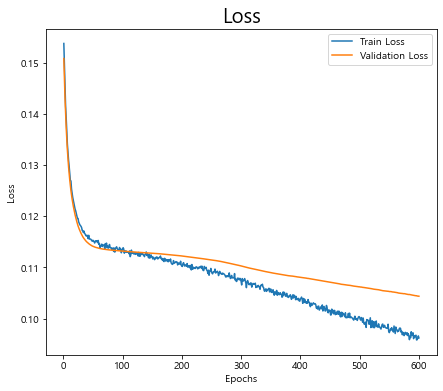

In [770]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

In [771]:
loss, acc = model.evaluate(test_dataset)

14/14 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.6506
